In [26]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp 
#import the entire linear model
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr 
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV


In [27]:
#Read the new excel file, this contains the annual pay for indiviual employees
#Read Excel data provided. Read the first tab.
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/ExtraDataForAkira.xlsx'
data1 = pd.read_excel(current_path + file)

In [28]:
data1.head()

,OLD # May 2018 Location Code,New # May 2019 Location Code,Department- Updated,LGBT,Managerial Level- Updated,Meaningful Innovation Opportunities,Pay Type,Responsibility,Role,Tenure,Work Status,Annual pay,zip(home),Job Title,Action/Reason Description,Voluntary/Involuntary
0,1075.0,1075.0,Admin,Yes,Employee-IC,A lot,Hourly,Neither children nor elders,RECRUITING PROGRAM COORDINATOR,6 months to 9 months,Full-time,52000.0,32806,RECRUITING PROGRAM COORDINATOR,NaN,NaN
1,5504.0,5954.0,Activities,No,Employee-IC,A lot,Hourly,Both children and elders,ENRICHMENT COORDINATOR,9 months to 1 year,Full-time,33280.0,80212,ENRICHMENT COORDINATOR,Resignation,Voluntary
2,5504.0,5954.0,Housekeeping-Maint-Sec,No,Frontline manager,A lot,Hourly,Both children and elders,HEAD HOUSEKEEPER,Over 20 years,Full-time,34632.0,80226,HEAD HOUSEKEEPER,NaN,NaN
3,5504.0,5954.0,Admin,No,Frontline manager,A lot,Hourly,Elders,ASSISTANT GENERAL MANAGER,1 year to 2 years,Full-time,45177.6,80107,ASSISTANT GENERAL MANAGER,Resignation,Voluntary
4,5504.0,5954.0,Housekeeping-Maint-Sec,No,Employee-IC,A lot,Hourly,Both children and elders,HOUSEKEEPING (CLEANING),1 year to 2 years,Full-time,29120.0,80219,HOUSEKEEPING (CLEANING),NaN,NaN


In [29]:
#Rename columns to remove the space and make it shorter.
data1.rename(columns = {'OLD # May 2018 Location Code':'LocationCode2018'}, inplace = True) 
data1.rename(columns = {'New # May 2019 Location Code':'LocationCode2019'}, inplace = True) 
data1.rename(columns = {'Annual pay':'AnnualPay'}, inplace = True) 

In [30]:
TestLocationCodes=data1.LocationCode2019.unique()
TestLocationCodes

array([1075., 5954., 5573., 5563., 5581., 5945., 5676., 5978., 5643.,
       5077., 5963., 5648., 5493., 6501., 5669., 5655., 5678., 5932.,
       5671., 5936.,   nan, 5417., 5199., 5944., 5586., 5970., 5126.,
       5482., 5484., 5310., 5979., 5938., 5553., 5280., 5024., 5477.,
       5683., 5951., 5931., 5964., 5906., 5056., 5269., 5680., 5935.,
       5986., 5907., 5331., 5475., 5370., 5649., 5568., 5646., 5929.,
       5677., 5473., 5657., 5990., 5476., 5983., 5972., 5930., 5682.,
       5495., 5939., 5941., 5200., 5948., 5137., 5937., 5065., 5078.,
       5015., 5301., 5974., 5940., 5966., 5681., 5658., 5560., 5478.,
       5995., 5640., 5967., 5240., 5981., 5660., 5946., 5437., 5318.,
       5565., 5174., 5580., 5999., 5494., 5962., 5481., 5644., 5564.,
       5091., 5965., 5359., 5675., 5968., 5953., 5492., 5562., 5663.,
       5574., 5567., 5992., 5168., 5109., 5998., 5361., 5020., 5673.,
       5674., 5647., 5684., 5372., 5311., 5943., 5665., 5587., 5971.,
       5052., 5991.,

In [31]:
#Load the 2018 May dataset.
#Read Excel data provided. Read the first tab.
current_path = os.getcwd()
file2 = '/datasets/ActivatedInsights/ActivatedInsight.xlsx'
data2 = pd.read_excel(current_path + file2)

#First two rows are excel column names that only exists for some columns. Remove them for now.
#Also some of the last few rows have no data in most columns.
data2 = data2.iloc[2:-13]
#LocationCode will contain the column for the location code for this study use the May 2019 code
LocationCode_for_data = data2.iloc[:,2]

In [32]:
#get median pay for each location. Go through the location code and get the data
#Ignore NaN (be default)
#DataArrayPCA_answers_df=pd.DataFrame(data=DataArrayPCA_answers)

#
location_pay = np.zeros((LocationCode_for_data.shape[0],1))

#Get the data for each location, calculate the median pay for that location
for index in range(LocationCode_for_data.shape[0]):
    location_data=data1.loc[data1['LocationCode2019'] == LocationCode_for_data.iloc[index],'AnnualPay']
    #calculate the media for that location
    location_pay[index] = location_data.median()
location_pay = pd.DataFrame(data=location_pay)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98dc37d550>]],
      dtype=object)

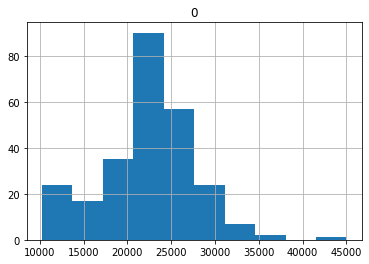

In [33]:
#We may not need log transform for this data.
location_pay.hist()

In [34]:
location_pay.isnull().values.sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98d82bcac8>]],
      dtype=object)

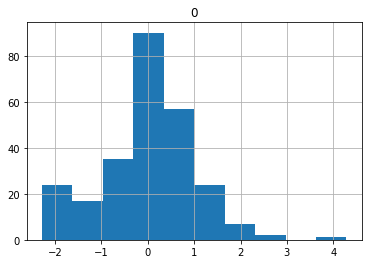

In [35]:
#Scale and standardize
scaler_location_pay = pp.StandardScaler().fit(location_pay)
location_payS = scaler_location_pay.transform(location_pay)
location_payS_df=pd.DataFrame(data=location_payS)
location_payS_df.hist()

In [36]:
location_payS_df.to_pickle("./location_pay.pkl")